In [4]:
from pandas import DataFrame, read_csv, set_option, cut, qcut, concat
from matplotlib.pyplot import figure, show, subplots, savefig
from ds_charts import dummify, plot_line, multiple_line_chart, discretize
from  mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer
set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sample = 0.001

file_tag = 'set2'
filename = 'lab03_knn_and_scaling/ew_data/set2'
target = 'ALARM'

dataOriginal: DataFrame = read_csv(f'ew_data/{file_tag}_mv_dummified.csv')
dataOriginal = dataOriginal.sample(frac=sample, replace=True, random_state=1)

## After equal-width

In [ ]:
data_treatment = 'equal_width' 
data = dataOriginal.drop(['GbCity', 'GbProv','Field_1', target], axis=1)
columns = ['CO_Mean','CO_Min', 'CO_Max', 'CO_Std', 'NO2_Mean', 'NO2_Min', 'NO2_Max', 'NO2_Std', 'O3_Mean', 'O3_Min', 'O3_Max','O3_Std', 'PM2.5_Mean', 'PM2.5_Min','PM2.5_Max','PM2.5_Std','PM10_Mean','PM10_Min','PM10_Max','PM10_Std','SO2_Mean','SO2_Min','SO2_Max','SO2_Std','hour','day','year']
data = data[columns]
bins = 3
data = discretize(data, 'uniform', bins, columns)
data

,CO_Mean_0.0,CO_Mean_1.0,CO_Mean_2.0,CO_Min_0.0,CO_Min_1.0,CO_Min_2.0,CO_Max_0.0,CO_Max_1.0,CO_Max_2.0,CO_Std_0.0,CO_Std_1.0,CO_Std_2.0,NO2_Mean_0.0,NO2_Mean_1.0,NO2_Mean_2.0,NO2_Min_0.0,NO2_Min_1.0,NO2_Min_2.0,NO2_Max_0.0,NO2_Max_1.0,NO2_Max_2.0,NO2_Std_0.0,NO2_Std_1.0,NO2_Std_2.0,O3_Mean_0.0,O3_Mean_1.0,O3_Mean_2.0,O3_Min_0.0,O3_Min_1.0,O3_Min_2.0,O3_Max_0.0,O3_Max_1.0,O3_Max_2.0,O3_Std_0.0,O3_Std_1.0,O3_Std_2.0,PM2.5_Mean_0.0,PM2.5_Mean_1.0,PM2.5_Mean_2.0,PM2.5_Min_0.0,PM2.5_Min_1.0,PM2.5_Min_2.0,PM2.5_Max_0.0,PM2.5_Max_1.0,PM2.5_Max_2.0,PM2.5_Std_0.0,PM2.5_Std_1.0,PM2.5_Std_2.0,PM10_Mean_0.0,PM10_Mean_1.0,PM10_Mean_2.0,PM10_Min_0.0,PM10_Min_1.0,PM10_Min_2.0,PM10_Max_0.0,PM10_Max_1.0,PM10_Max_2.0,PM10_Std_0.0,PM10_Std_1.0,PM10_Std_2.0,SO2_Mean_0.0,SO2_Mean_1.0,SO2_Mean_2.0,SO2_Min_0.0,SO2_Min_1.0,SO2_Min_2.0,SO2_Max_0.0,SO2_Max_1.0,SO2_Max_2.0,SO2_Std_0.0,SO2_Std_1.0,SO2_Std_2.0,hour_0.0,hour_1.0,hour_2.0,day_0.0,day_1.0,day_2.0,year_0.0,year_1.0,year_2.0
128037,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
5192,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
50057,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
109259,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
73349,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71118,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
119440,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
38122,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0
15917,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
MIN_SUP: float = 0.33
#var_min_sup =[0.2, 0.1] + [i*MIN_SUP for i  in range(100, 0, -10)]
var_min_sup = [0.3]
var_min_sup.sort()
patterns: DataFrame = apriori(data, min_support=MIN_SUP, use_colnames=True, verbose=True)
print(len(patterns),'patterns')
nr_patterns = []
for sup in var_min_sup:
    pat = patterns[patterns['support'] >= sup]
    nr_patterns.append(len(pat))

figure(figsize=(6, 4))
plot_line(var_min_sup, nr_patterns, title='Nr Patterns x Support', xlabel='support', ylabel='Nr Patterns')
savefig(f'images/{file_tag}/{file_tag}_{data_treatment}_patterns_support.png')
show()

NameError: name 'apriori' is not defined

In [ ]:
MIN_CONF: float = 0.1
rules = association_rules(patterns, metric='confidence', min_threshold=MIN_CONF*5, support_only=False)
print(f'\tfound {len(rules)} rules')

NameError: name 'association_rules' is not defined

In [ ]:
def plot_top_rules(rules: DataFrame, metric: str, per_metric: str, file_tag: str, data_treatment: str) -> None:
    _, ax = subplots(figsize=(6, 3))
    ax.grid(False)
    ax.set_axis_off()
    ax.set_title(f'TOP 10 per Min {per_metric} - {metric}', fontweight="bold")
    text = ''
    cols = ['antecedents', 'consequents']
    rules[cols] = rules[cols].applymap(lambda x: tuple(x))
    for i in range(len(rules)):
        rule = rules.iloc[i]
        text += f"{rule['antecedents']} ==> {rule['consequents']}"
        text += f"(s: {rule['support']:.2f}, c: {rule['confidence']:.2f}, lift: {rule['lift']:.2f})\n"
    ax.text(0, 0, text)
    savefig(f'images/{file_tag}/{file_tag}_{data_treatment}_top_{metric}_{per_metric}.png')
    show()

def analyse_per_metric(rules: DataFrame, metric: str, metric_values: list, file_tag: str, data_treatment: str) -> list:
    print(f'Analyse per {metric}...')
    conf = {'avg': [], 'top25%': [], 'top10': []}
    lift = {'avg': [], 'top25%': [], 'top10': []}
    top_conf = []
    top_lift = []
    nr_rules = []
    for m in metric_values:
        rs = rules[rules[metric] >= m]
        nr_rules.append(len(rs))
        conf['avg'].append(rs['confidence'].mean(axis=0))
        lift['avg'].append(rs['lift'].mean(axis=0))

        top_conf = rs.nlargest(int(0.25*len(rs)), 'confidence')
        conf['top25%'].append(top_conf['confidence'].mean(axis=0))
        top_lift = rs.nlargest(int(0.25*len(rs)), 'lift')
        lift['top25%'].append(top_lift['lift'].mean(axis=0))

        top_conf = rs.nlargest(10, 'confidence')
        conf['top10'].append(top_conf['confidence'].mean(axis=0))
        top_lift = rs.nlargest(10, 'lift')
        lift['top10'].append(top_lift['lift'].mean(axis=0))
    print("metric_values=",metric_values)
    _, axs = subplots(1, 2, figsize=(10, 5), squeeze=False)
    multiple_line_chart(metric_values, conf, ax=axs[0, 0], title=f'Avg Confidence x {metric}',
                           xlabel=metric, ylabel='Avg confidence')
    multiple_line_chart(metric_values, lift, ax=axs[0, 1], title=f'Avg Lift x {metric}',
                           xlabel=metric, ylabel='Avg lift')
    savefig(f'images/{file_tag}/{file_tag}_{data_treatment}_{metric}_avg_lift_avg_confidence.png')
    show()

    plot_top_rules(top_conf, 'confidence', metric, file_tag, data_treatment)
    plot_top_rules(top_lift, 'lift', metric, file_tag, data_treatment)

    return nr_rules

Analyse per support...
metric_values= [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


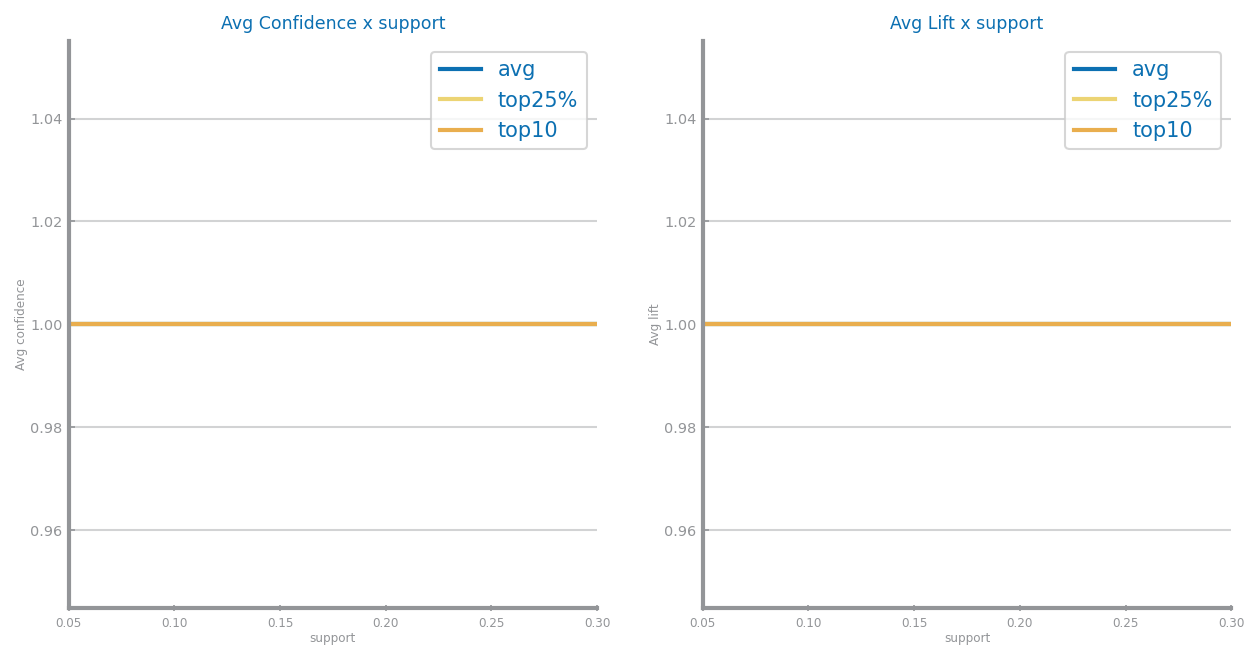

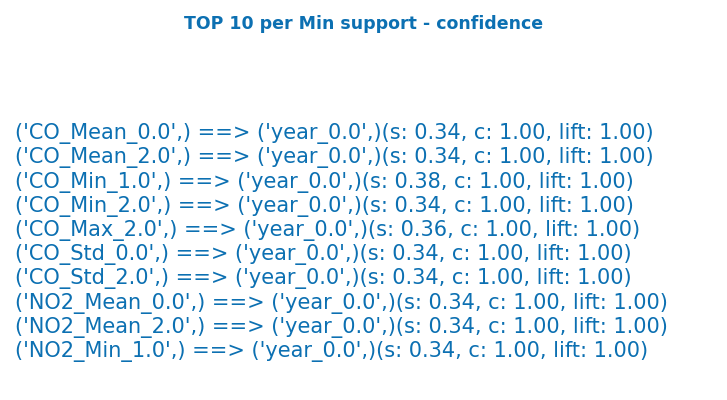

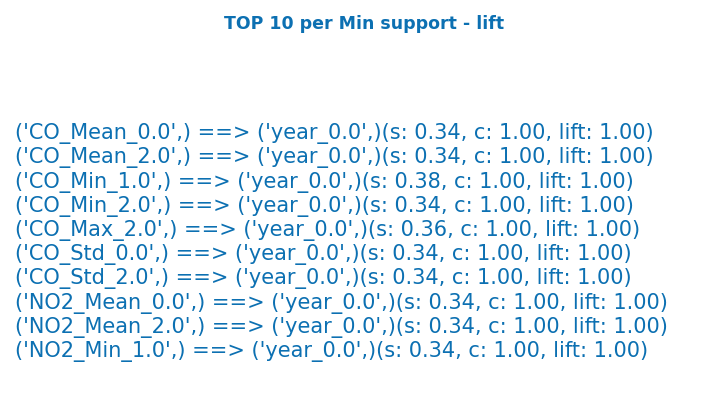

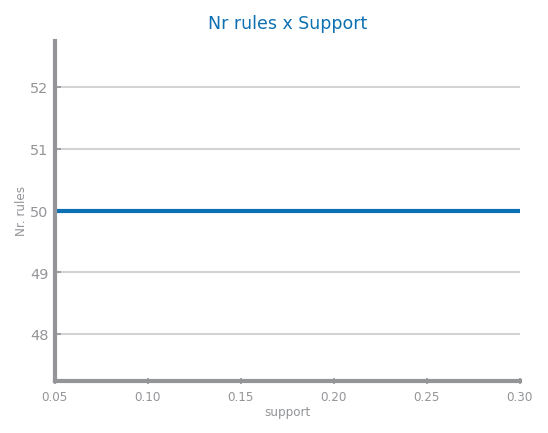

In [ ]:
nr_rules_sp = analyse_per_metric(rules, 'support', var_min_sup, file_tag, data_treatment)
plot_line(var_min_sup, nr_rules_sp, title='Nr rules x Support', xlabel='support', ylabel='Nr. rules', percentage=False)
savefig(f'images/{file_tag}/{file_tag}_{data_treatment}_rules_support.png')

Analyse per confidence...


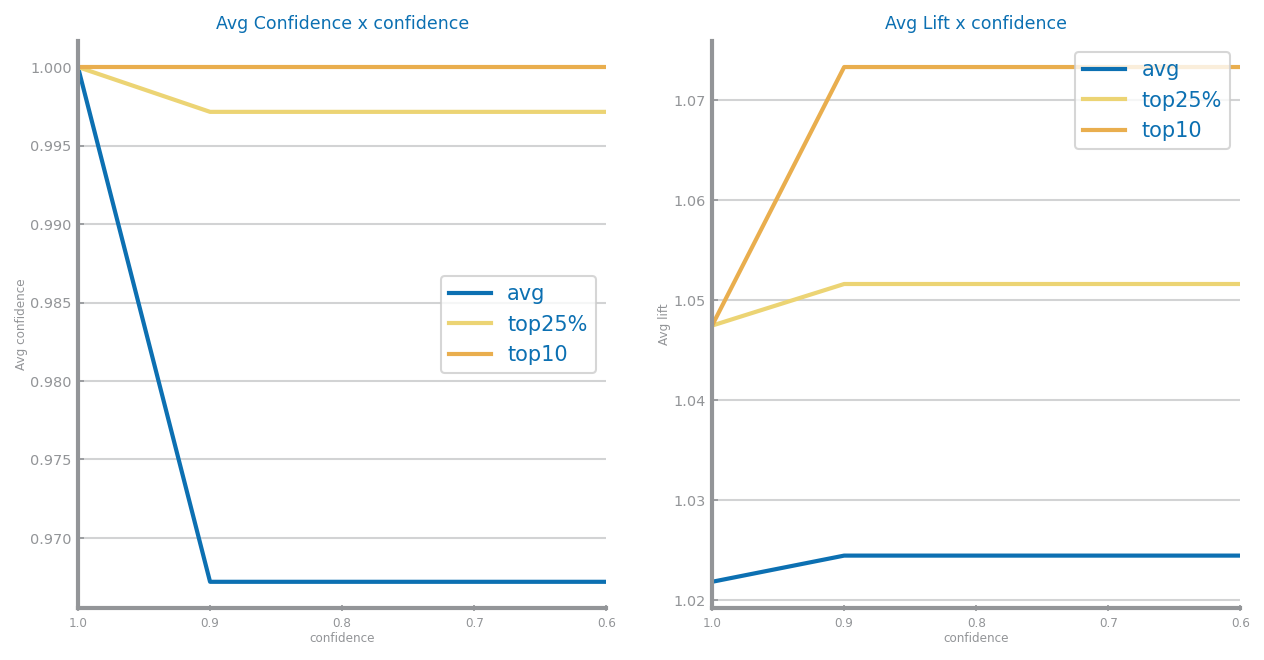

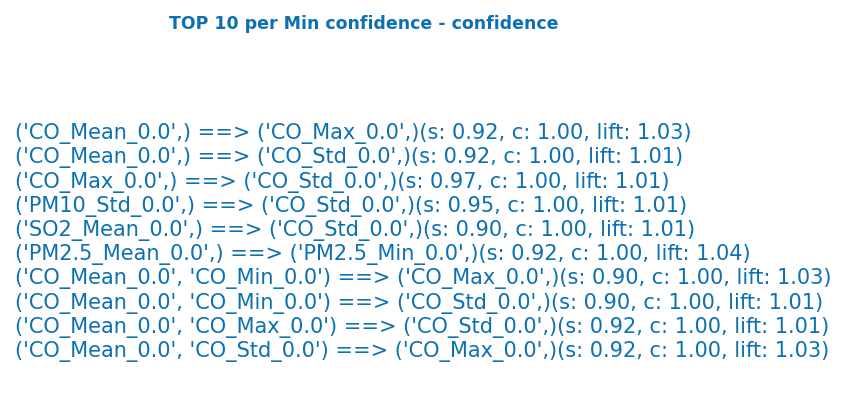

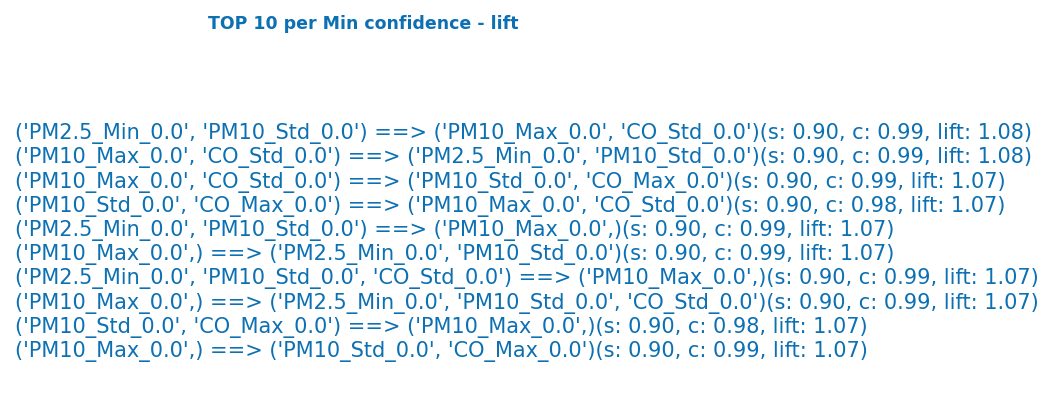

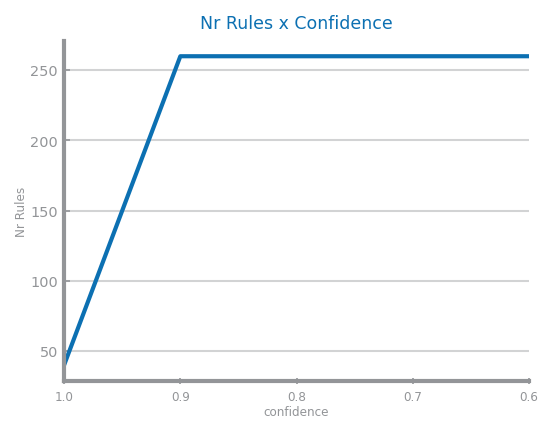

In [ ]:
var_min_conf = [i * MIN_CONF for i in range(10, 5, -1)]
nr_rules_cf = analyse_per_metric(rules, 'confidence', var_min_conf, file_tag, data_treatment)
plot_line(var_min_conf, nr_rules_cf, title='Nr Rules x Confidence', xlabel='confidence', ylabel='Nr Rules', percentage=False)
savefig(f'images/{file_tag}/{file_tag}_{data_treatment}_rules_confidence.png')